# Brainster Academy Final Project
### Team 3: Tatjana Veljkovic, Ilija Todorov, Ivana Tomovska Efremov

### Part Three

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import string
import nltk
nltk.download('punkt')
import re
from string import punctuation
from nltk.tokenize import WordPunctTokenizer, PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import tqdm
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

from statistics import mean

from scipy import spatial
from ast import literal_eval

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
#!pip install pillow

In [4]:
#!pip install wordcloud

### Read data - 2011-2015

In [5]:
List_of_all_files = ['PartTwo_2011','PartTwo_2012','PartTwo_2013','PartTwo_2014','PartTwo_2015']

In [6]:
Working_file = List_of_all_files[1] #Chose file for working
print(Working_file)

PartTwo_2012


### Read year 2012

In [7]:
tweets_clustered = pd.read_csv(Working_file + '.csv')

In [8]:
tweets_clustered.head(2)

,source,year,Tweets_cleaned,Cluster_labels,month,day_of_week,vectors
0,cnnhealth,2012,baby boomer nun revolutionize care,1,12,0,"[-0.5100927352905273, -1.6049264669418335, 0.7..."
1,cnnhealth,2012,hope hear cochlear implant,1,12,5,"[0.3121253252029419, -1.456074833869934, 0.409..."


In [9]:
tweets_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          5797 non-null   object
 1   year            5797 non-null   int64 
 2   Tweets_cleaned  5794 non-null   object
 3   Cluster_labels  5797 non-null   int64 
 4   month           5797 non-null   int64 
 5   day_of_week     5797 non-null   int64 
 6   vectors         5797 non-null   object
dtypes: int64(4), object(3)
memory usage: 317.1+ KB


In [10]:
tweets_clustered['year'].value_counts().sort_index()

2012    5797
Name: year, dtype: int64

### Deleting NaN rows

In [11]:
tweets_clustered.shape

(5797, 7)

In [12]:
tweets_clustered['Tweets_cleaned'].isna().sum()

3

In [13]:
tweets_clustered.loc[tweets_clustered['Tweets_cleaned'].isna()]

,source,year,Tweets_cleaned,Cluster_labels,month,day_of_week,vectors
1553,goodhealth,2012,NaN,1,5,0,"[0.05056934803724289, -0.15799608826637268, 0...."
1623,goodhealth,2012,NaN,1,4,1,"[0.14140497148036957, -0.08612056076526642, -0..."
2280,latimeshealth,2012,NaN,1,11,5,"[0.006797503679990768, -0.16397634148597717, 0..."


In [14]:
tweets_clustered.dropna(subset=['Tweets_cleaned'], inplace=True)

In [15]:
tweets_clustered.shape

(5794, 7)

In [16]:
clusters = tweets_clustered['Cluster_labels'].value_counts()

# General info

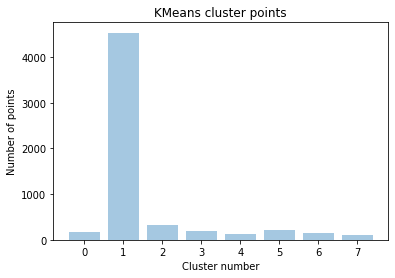

In [17]:
plt.bar([x for x in range(len(clusters))], tweets_clustered.groupby(['Cluster_labels'])['source'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [18]:
twitter_weekdays = tweets_clustered['day_of_week'].value_counts()
df_weekdays = pd.DataFrame(data=twitter_weekdays)
df_weekdays['Weekday'] = df_weekdays.index
df_weekdays.sort_values('Weekday')

,day_of_week,Weekday
0,943,0
1,1039,1
2,1067,2
3,1135,3
4,1032,4
5,363,5
6,215,6


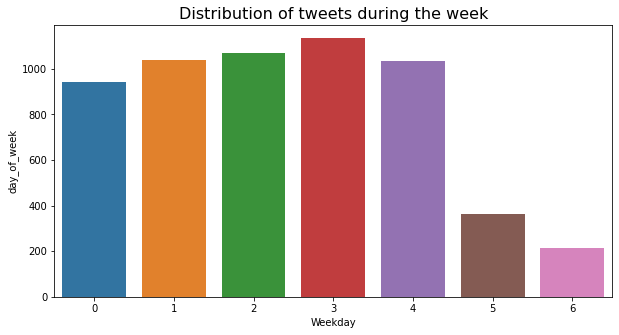

In [19]:
plt.figure(figsize = (10,5))
sns.barplot(y ='day_of_week', x = 'Weekday', data = df_weekdays)
plt.title('Distribution of tweets during the week', fontsize=16)
plt.show()

### Note: Most of the tweets are released during workdays (3 to 4 times more on workdays than during weekend days)

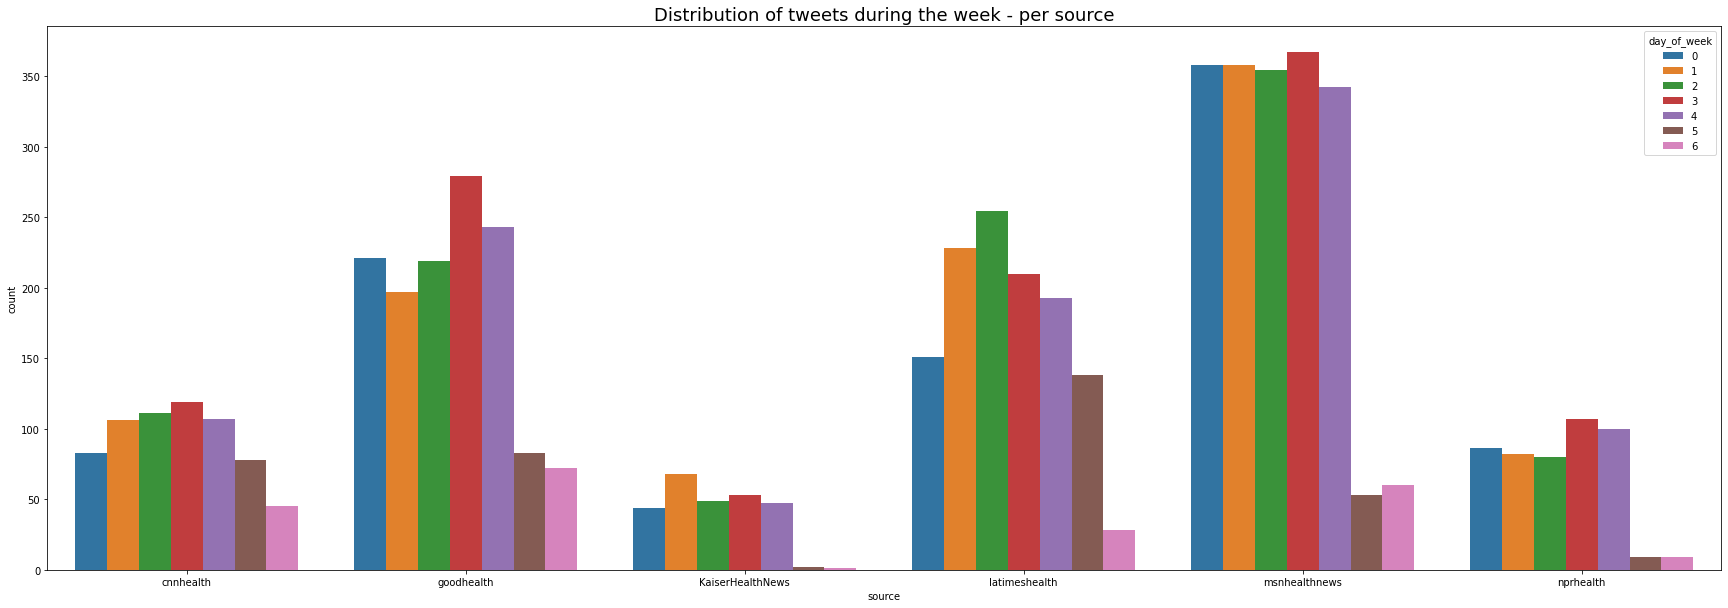

In [20]:
plt.figure(figsize = (30,10))
sns.countplot(x ='source', hue = "day_of_week", data = tweets_clustered)
plt.title('Distribution of tweets during the week - per source', fontsize=18)
plt.show()

### Note: Uneven distribution od tweets among sources, same pattern of tweets during days of the week

In [21]:
tweets_breakdown = tweets_clustered.groupby(['source', 'month']).count()
#tweets_breakdown[:50]

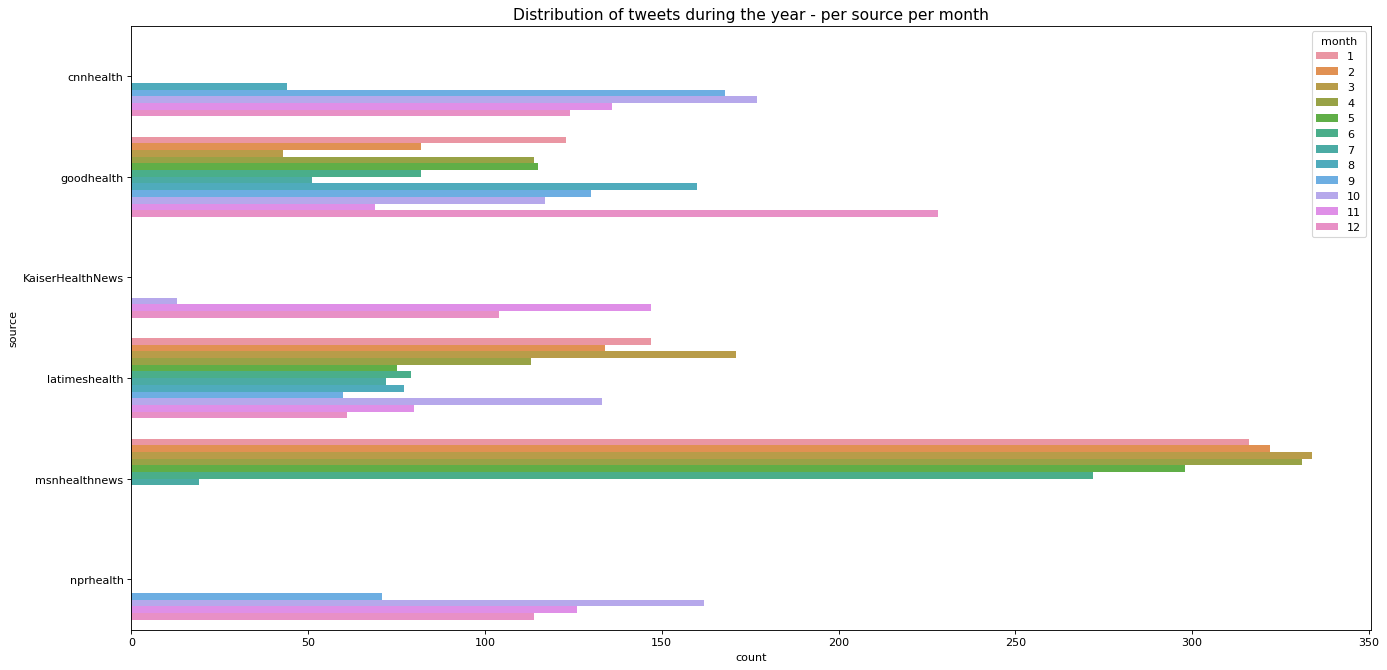

In [22]:
plt.figure(figsize=(20,10),dpi=80)
sns.countplot(data=tweets_clustered, y="source", hue="month")
plt.title('Distribution of tweets during the year - per source per month', fontsize=14)
plt.show()

# Word cloud per source

In [23]:
source = tweets_clustered['source'].unique().tolist()
#source

In [24]:
source_list_toshow = []

source_list = tweets_clustered['source'].unique().tolist()

for i in source_list:
    source_individual = tweets_clustered[tweets_clustered['source'] == i]
    text_source_individual = " ".join(cat for cat in source_individual.Tweets_cleaned)
    #mask = np.array(Image.open("twitter-2012-negative-logo-5C6C1F1521-seeklogo.com.png"))
    
    
    word_cloud_source = WordCloud(
    width=5000,
    height=3000,
    random_state=1,
    #mask=mask,
    background_color="white",
    colormap="winter",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text_source_individual)
    
    source_list_toshow.append(word_cloud_source)

In [25]:
#source 

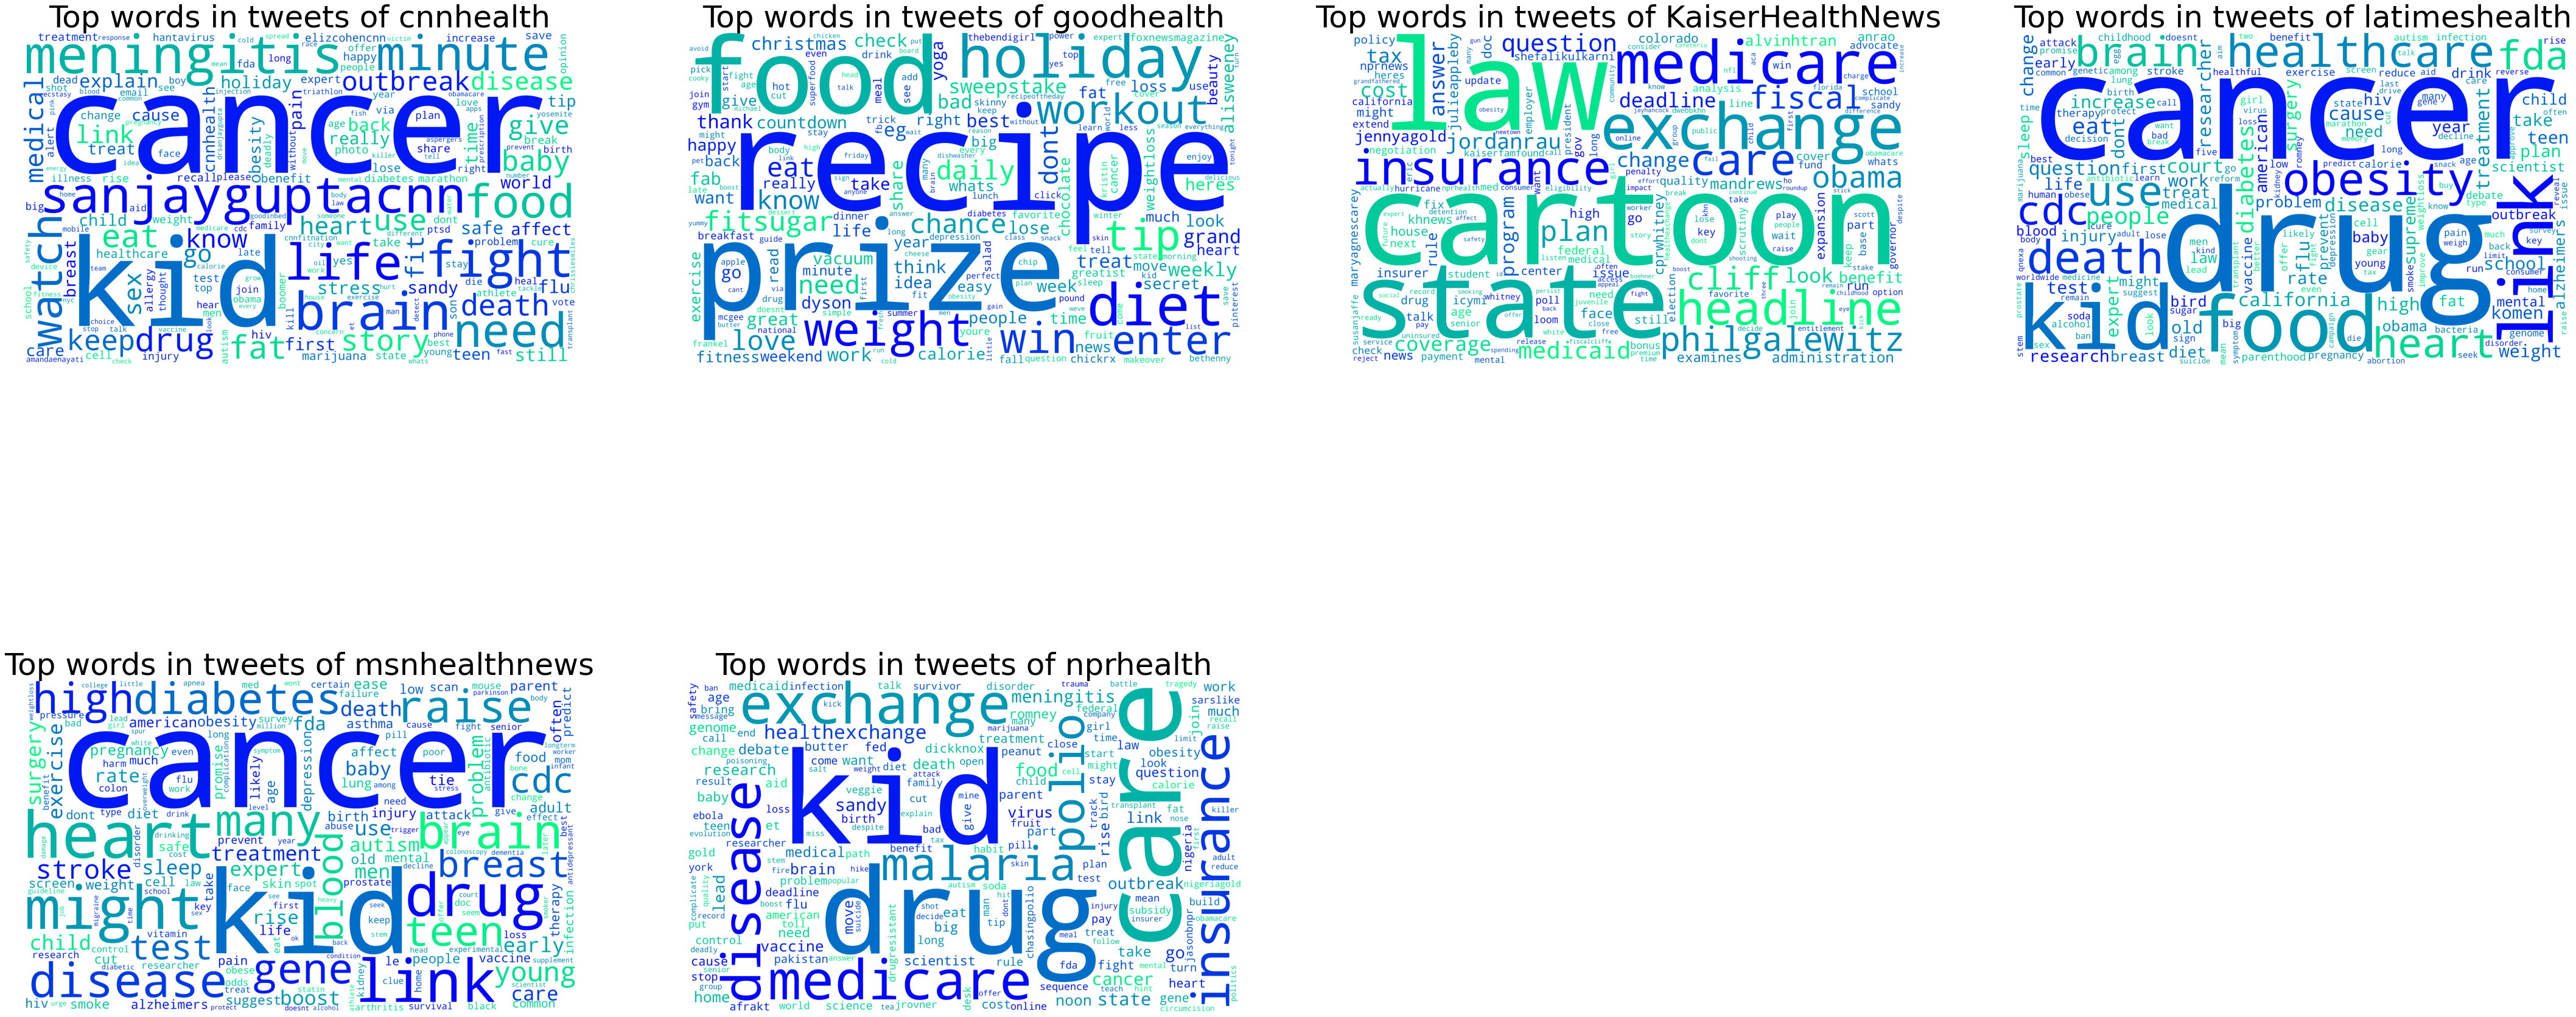

In [26]:
fig = plt.figure(figsize=(75,75))
count = 1

for i in range(len(source)):
    ax=fig.add_subplot(4,4, count)
    ax.imshow(source_list_toshow[i])
    plt.title((f'Top words in tweets of {source[i]}'), size=50)
    ax.axis("off")
    count += 1
plt.show()